In [1]:
# input
# weights
# bias - if all the values are zeroes, then our neuron will take what decision... Treshold
# aggregation
# activation function
# training
# output
# perceptron which should mimick the behaviour of and gate

In [3]:
import matplotlib.pyplot as plt # to diplsay the images we get
import tensorflow as tf

In [4]:
from tensorflow.keras import datasets,layers,models

In [5]:
(train_img,train_labels),(test_img,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 141s 1us/step


In [8]:
train_labels.shape

(50000, 1)

In [9]:
train_img=train_img/255

In [10]:
train_img

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [11]:
test_img=test_img/255

In [12]:
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

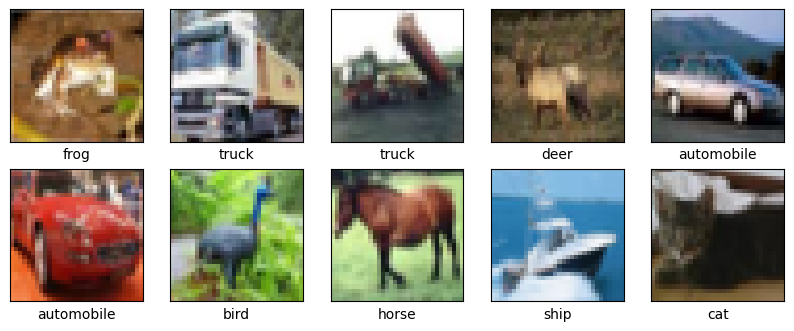

In [16]:
plt.figure(figsize=(10,10))

for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[i])
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()


In [17]:
model=models.Sequential()

In [19]:
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) # relu - range (0,1)
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


In [20]:
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())

model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [22]:
h=model.fit(train_img,train_labels,epochs=10, validation_data=(test_img,test_labels))

Epoch 1/10
1563/1563 [==============================] - 66s 40ms/step - loss: 1.5390 - accuracy: 0.4366 - val_loss: 1.2291 - val_accuracy: 0.5612
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1709 - accuracy: 0.5846 - val_loss: 1.0778 - val_accuracy: 0.6163
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0168 - accuracy: 0.6444 - val_loss: 1.0149 - val_accuracy: 0.6457
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9168 - accuracy: 0.6782 - val_loss: 0.9492 - val_accuracy: 0.6714
Epoch 5/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.8426 - accuracy: 0.7056 - val_loss: 0.8861 - val_accuracy: 0.6919
Epoch 6/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.7815 - accuracy: 0.7263 - val_loss: 0.9020 - val_accuracy: 0.6875
Epoch 7/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7288 - accuracy: 0.7432 - val_loss: 0.8698 -

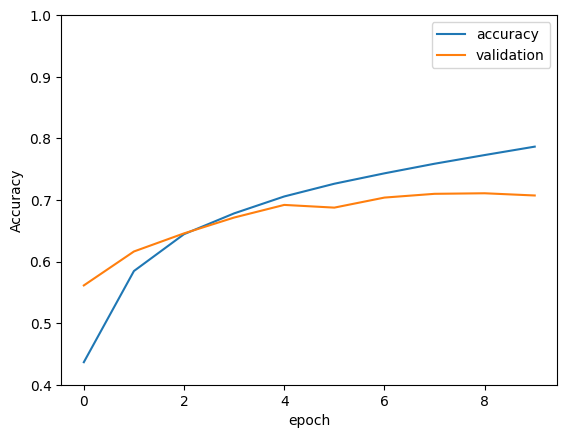

In [23]:
plt.plot(h.history['accuracy'],label='accuracy')
plt.plot(h.history['val_accuracy'],label="validation")
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4,1])
plt.legend()
plt.show()